![Project EDEN Logo](EDEN.png)

<br>
<br>
<font size='6'><u><b>Lightcurves of Transiting Exoplanets</b></u></font>
<br>

##### By [Dr. Daniel Apai](http://apai.space) and [Dr. Ben Rackham](http://rackham.space)
##### Revised by Andres Jaramillo and Alex Bixel

# Table of Contents

* [How to Use This Notebook](#How-to-Use-This-Notebook)
* [1. Introduction](#1.-Introduction)
* [2. Interpreting a Lightcurve with a Transit](#2.-Interpreting-a-Lightcurve-with-a-Transit)
* [3. Determining the Orbital Period](#3.-Determining-the-Orbital-Period)
* [4. Determining the Size of a Planet](#4.-Determining-the-Size-of-a-Planet)
* [5. The Transit of HD 209458 b](#5.-The-Transit-of-HD-209458-b)
* [6. Detecting Transits of Earth-sized Exoplanets](#6.-Detecting-Transits-of-Earth-sized-Exoplanets)
___

# How to Use This Notebook

The webpage you are in is actually an app - much like the ones on your cellphone. This app consists of cells.

An *input* cell looks like a light grey box with an `In [ ]:` on its left. Input cells each contain code - instructions to make the computer do something.

To activate or select a cell, click anywhere inside of it.

<div class='alert alert-info'>
    <font size='3'><b>Select the cell below and read its contents.</b></font>
</div>

In [ ]:
# Text that follows a "#" is known as a comment.
# Comments do not affect your code in any way.
# You should always read the comments at the top of each cell you interact with.
# Comments will be used to describe what the cell's code is actually doing.

To execute or run a selected cell, hit `[Shift + Enter]` on your keyboard.

<div class='alert alert-info'>
    <font size='3'><b>Select the cell below and read its contents. Then, run the cell.</b></font>
</div>

In [ ]:
# Text that DOESN'T follow a "#" is considered code.
# Lines of code are instructions given to your computer.
# The line of code below is a "print" statement.
# A print statement literally prints out the text between its quotes.

print("Congrats! You have successfully run your first cell!")

Running a cell creates an *output* directly below it. An output can be some text, a graph, an interactive slider, or even nothing at all! For that last case, you know you have run a cell when the `In [ ]:` becomes `In [#]:`, where "#" is any number.

You can learn more about how Jupyter notebooks work at https://try.jupyter.org/
___

# 1. Introduction

In  this  activity  we  will  explore  how  some  extrasolar  planets  can  be  discovered  and characterized by precisely measuring the brightness of their host stars. When planets pass in front of their host stars (as seen from Earth) they cover part of the host star’s disk — making it look  a  tiny  bit  fainter.  These  events  are  called <font color="green">**planetary  transits**</font>.  The  slight  dimming  has  a characteristic shape and Project EDEN searches for such events to find the planets that cause them.  NASA’s  Kepler  Space  Observatory  has  used  exoplanet  transit  events  to  identify  over 4,000 new extrasolar planets – the largest bounty of new worlds ever!

We will explore how transits can be analyzed — not only to identify the presence of a planet, but  also  to  learn  about  its  basic  properties:  size,  orbital  period,  and  —  with  some  additional information — density and likely composition.

<font size=4 color="blue">Warmup question: Check out the animation of two transiting planets below. Which planet causes a greater change in the star's brightness? Why?</font>

![SegmentLocal](transitgif.gif "Animation of two transiting exoplanets. Credit: NASA")

## First let’s clarify a few key concepts:

<br>
<font color="green">

**Lightcurve:** a figure that shows the brightness of an object (here the host star) over time. For a typical star, this would be a flat line: the star is always the same brightness.

**Transit Event:** an event during which a planet passes in front of its host star (as seen from Earth), blocking a fraction of light from star and causing it to appear dimmer.

**Transit Depth:** the maximum brightness difference between the in-transit and out-of-transit brightness of the star.

**Ingress:** The first stage of the transit, during which only part of the planet is only obscuring the star.

**Egress:** The final stage of the transit, during which only part of the planet is only obscuring the star.
    
</font>
___

# 2. Interpreting a Lightcurve with a Transit

In this activity, we will use the Python package `batman` to simulate transit lightcurves.

Let's start by importing some necessary Python packages.

To do so, **highlight the cell below and press `Shift+Enter` to run the code**. This is also how we will run all following snippets of code throughout this exercise.

In each of the code cells below, anything following the the `#` sign is a comment. It is meant to help you read the code, but it is not read by the computer.

In [5]:
# Import some packages which we'll be using below
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import display
from ipywidgets import interactive
import astropy.units as u
import numpy as np
import batman
from imports import *

# Set the appearance of the figures
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 18


To better understand how to use the `batman` package to model transit lightcurves, let's make an example lightcurve of a **hot Jupiter**: a Jupiter-sized exoplanet on a very short orbit.

First, we will initialize a `params` object to hold the orbital parameters of our example planet. The parameters provided below describe the orbit of the planet and its orientation, which affect the exact shape of the transit and how symmetric it is.

In [6]:
params = batman.TransitParams()                  # Creates a new params object
params.t0 = 0.                                   # time of inferior conjunction
params.per = 3.                                  # orbital period (days)
params.rp = ((1.0*u.Rjup)/(1.0*u.Rsun)).si.value # planet radius (in units of stellar radii)
params.a = 15.                                   # semi-major axis (in units of stellar radii)
params.inc = 87.                                 # orbital inclination (in degrees)
params.ecc = 0.                                  # eccentricity
params.w = 90.                                   # longitude of periastron (in degrees)
params.u = [0.1, 0.1]                            # limb darkening coefficients [u1, u2]
params.limb_dark = "quadratic"                   # limb darkening model

Now let's define the time points we're interested in and generate a model of the transit event.

In [7]:
time_1 = np.linspace(-0.02, 0.02, 1000)*params.per # Creates an array of 1000 points 
                                                     # near the transit time
model_1 = batman.TransitModel(params, time_1)        # Creates the model

flux_1 = model_1.light_curve(params) # Calculates the light curve

Now let's look at the results.

In [8]:
def example_transit(Time=0.1):
    example_transit_plot(Time,time_1,flux_1)
    plt.show()

interactive_plot = interactive(example_transit, Time=(.1,2.9,0.2))
display(interactive_plot)

interactive(children=(FloatSlider(value=0.1, description='Time', max=2.9, min=0.1, step=0.2), Output()), _dom_…

For Question 1 and all following questions, take a moment to answer the question yourself and then discuss your answer with your partner.

<br><font color="blue" size=4>Question 1: From the interactive figure above: What is your estimate of the transit depth? Approximately how long are the ingress/egress stages?</font>

Need help? Recall the definitions from above:
    
<font color="green">    

**Transit Depth:** the maximum brightness difference between the in-transit and out-of-transit brightness of the star. 
<br>
**Ingress:** The first stage of the transit, during which only part of the planet is only obscuring the star.
<br>
**Egress:** The final stage of the transit, during which only part of the planet is only obscuring the star.

</font>

____

# 3. Determining the Orbital Period

The <font color="green">**orbital period** is the time that it takes for a planet to complete an orbit</font>. For Earth this is one year, but some planets have much shorter or much longer orbital periods. Once the orbital period of a planet and the mass of its host star are known, it is possible to calculate the radius of its orbit—in other words, how far is it from its host star.

Let's look at an example of a lightcurve with multiple transits of the same planet.  We'll use the same hot Jupiter parameters as before, but we'll define a new time array, `time_2`, which covers a longer time period so that we can visualize multiple transits. **After you run the next cell, answer the question below.**

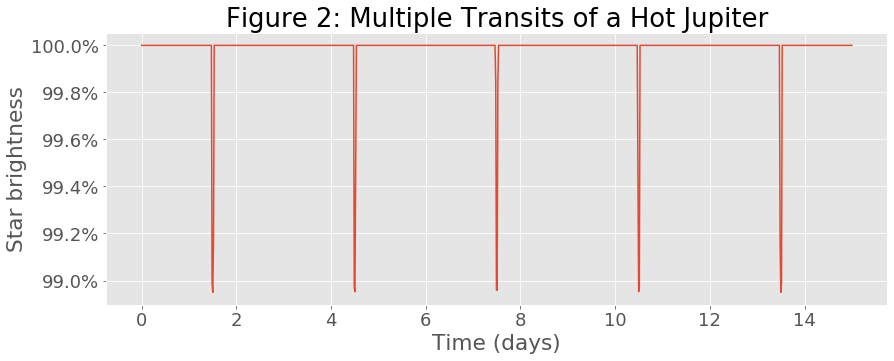

In [9]:
time_2 = np.linspace(-2.5, 2.5, 1000)*params.per
model_2 = batman.TransitModel(params, time_2)
flux_2 = model_2.light_curve(params)

plot_multiple_transits(time_2,flux_2)
plt.show()

<br><font color="blue" size=4>Question 2: How do you think the orbital period of a transiting planet could be measured from the above lightcurve?</font>

Now let's take a look at what transit lightcurves look like for planets with different orbital periods.

Run the code in the cell below to generate an interactive version of the transit model.

In [10]:


def transit_model_1(period):
    transit_model_1_plot(period)
    plt.show()
    
print('Using the slider below, vary the orbital period (in units of days):')
interactive_plot = interactive(transit_model_1, period=(0.5, 5, 0.5))
display(interactive_plot)

Using the slider below, vary the orbital period (in units of days):


interactive(children=(FloatSlider(value=2.5, description='period', max=5.0, min=0.5, step=0.5), Output()), _do…

<font color="blue" size=4>Question 3: Which of the following statements are true for a 2.00-day period (Earth day) hot Jupiter during a 12-day-long observation?</font>

**A)** Seven local years have passed on this planet.

**B)** Six local years have passed on this planet.

**C)** Fourteen local years have passed on this planet.

**D)** Twelve local years have passed on this planet.

___


<font color="red" size=3>*When you reach this point, wait for further instructions.*</font>

___

# 4. Determining the Size of a Planet

The larger the planet the larger the fraction of its host star that it can cover. A planet as large as its host star (an unrealistic example) could cover the entire star from view. In reality, most planets are very smaller, compared  to even the smallest stars. Therefore, they only cover part a small fraction of the host star’s disk.

Run the code below to draw a view of a planetary transit as seen from Earth.

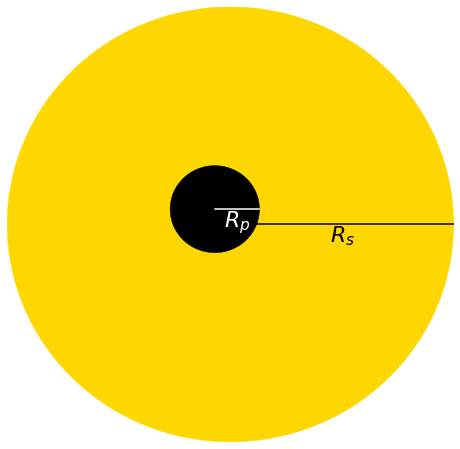

In [16]:
# Change these values!
m_planet = 0.5 # Earth mass - range: 0.001-0.5
m_star = 10 # Earth mass - range: 0.1-10
r_planet = 1.0 # Solar radius - range: 0.01-1.0
r_star = 5. # Solar radius - range: 0.1-5.0

# Make the plot
planet_size_plot(m_planet,m_star,r_planet,r_star)
plt.show()

The circles represent the star and the planet. The radius of the star ($R_{*}$) and the radius of the planet ($R_{p}$) are shown on the figure. The mass of the star is $M_{*}$ and the mass of the planet is $M_{p}$.

*Modify the code above and re-run the cell to plot results for different values of `m_planet`, `m_star`, `r_planet`, and `r_star`.*

*Discuss with your partner which factors influence the transit depth.*

<br><font color="blue" size=4>Question 4: Which of the following formulae may describe best the transit depth and why?</font>

**A)**  $D = (M_{*}^{2} R_{*}) / (M_{p}^{2} R_{p})$

**B)**  $D = R_{*} / R_{p}$

**C)**  $D = M_{*} / M_{p}$

**D)**  $D = R_{p}^{2} / R_{*}^{2}$

Need help? Recall the definition from above:

<font color="green">
    
**Transit Depth:** the maximum brightness difference between the in-transit and out-of-transit brightness of the star.
</font>
____

# 5. The Transit of HD 209458 b

Now let's figure out the size of an actual transiting exoplanet!

Run the code in the cell below to plot an observed transit lightcurve of the exoplanet HD 209458 b.

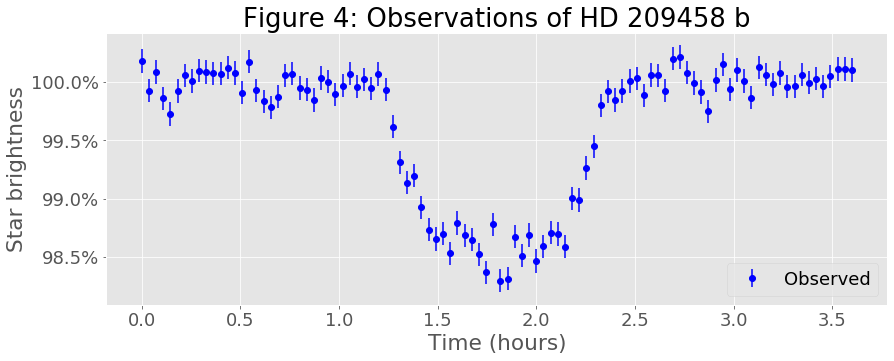

In [17]:
# Loading observed data
time_obs, flux_obs = np.loadtxt('HD209458b.dat', unpack=True)

# Plot the data
plot_data(time_obs,flux_obs)
plt.show()

The lightcurve shows the exoplanet transit, but it also displays scatter due to noise sources that are inherent in any observation.  We will fit different models against these noisy data to make our best estimate of the planet's radius.

Run the code in the cell below to generate a new interactive version of the transit model.

In [18]:
def transit_model_2(radius):
    transit_model_2_plot(radius)
    plt.show()

print('Using the slider below, vary the exoplanet radius (in units of Jupiter radii)' + 
      ' to find the best model to match the data:')
interactive_plot = interactive(transit_model_2, radius=(0.6, 2.1, 0.2))
display(interactive_plot)

Using the slider below, vary the exoplanet radius (in units of Jupiter radii) to find the best model to match the data:


interactive(children=(FloatSlider(value=1.2000000000000002, description='radius', max=2.1, min=0.6, step=0.2),…

<font color="blue" size=4>Question 5: What is the best-fit radius for HD 209458 b?</font>
___

# 6. Detecting Transits of Earth-sized Exoplanets

In this final exercise, we will explore how we can detect transits of exoplanets the size of Earth.

Run the code below to generate an interactive verision of the transit model that will let you vary the both radius of the planet ($R_{p}$) and the radius of the star ($R_{s}$). Each time you change a parameter, it will show you the true transit model and make a new simulated observational dataset.

In [19]:
def transit_model_3(Rp, Rs=1.0):
    transit_model_3_plot(Rp,Rs)
    plt.show()
    
print('Using the slider below, vary the exoplanet radius (in units of Earth radii)' + 
      ' and the star radius (in units of solar radii):')
interactive_plot = interactive(transit_model_3, Rp=(0.5, 4, 0.5), Rs=(0.1, 1.01, 0.1))
display(interactive_plot)

Using the slider below, vary the exoplanet radius (in units of Earth radii) and the star radius (in units of solar radii):


interactive(children=(FloatSlider(value=2.0, description='Rp', max=4.0, min=0.5, step=0.5), FloatSlider(value=…

<font color="blue" size=4>Question 6:  With this level of noise, how small does the star have to be to reliably detect the transit of an Earth-sized ($R_{p} = 1.0 R_{Earth}$) exoplanet?</font>
___